# Image processing
# Lab IV - Image segmentation

## 1. Introduction
During the previous labs and lectures, some basic image processing tasks have been presented: enhancements, filtering, etc. Another crucial task is image segmentation. This is the process in which an algorithm is used to find objects of interest in images.

There are multiple ways to segment images, however the focus of this lab will be histogram-based segmentation.

## 2. Histograms
The simplest definition of a histogram is that it is a function which shows how often each grayscale value appears in an image.

<img src="media/hist.png"><center>A grayscale image and its histogram</center>

Since the histogram counts how many times a value is repeated, the spatial arrangements are not visible in it. Both images in the next figure have the same histogram.
<img  src="media/hist2.png"><center>Example of images with the same histogram</center>

In order to use histogram segmentation the objects and the background need to have different grayscale values. After the histogram is displayed, a set of thresholds need to be decided in order to separate the objects and background.
<img src="media/levels.png"><center>The correspondence between different objects of an image and the background.</center>

## 3. Algorithm
The steps needed to segment an image based on its histogram are the following:
 - Read the image
 - Convert it to grayscale (the values are now between 0 and 1)
 - Scale the values to be between 0 and 255
 - View the image
 - Compute the histogram with
 ```python
hist,_ = np.histogram(img,range(0,256))
```
 - Display the histogram using the plot function of matplotlib
 ```python
plt.figure(figsize=(10,10)),plt.plot(hist)
```
 - Decide the thresholds
 - Create a blank image
```python
out = np.zeros(img.shape)
```
 - Separate between objects and background:
     - pixels with values lower than $T_a$ belong to the background and are given the value 0
     for this part, use numpy indexing to go faster
     ```python
     [img<Ta] = 0
     ```
     - pixels between thresholds $T_a$ and $T_b$ belong to object "A" and are given the value 1, etc.
     for multiple conditions, use ```np.logical_and(X,Y)```
     ```python
     out[np.logical_and(img>=Ta, img<Tb)] = 1
     ```
 - View the new image

## 4. Drawbacks
 Even though it is effective this algorithm is not perfect. The method is fully manual: the user needs to look at the histogram and decide the thresholds and number of objects (there are algorithms which fix this). Also, if the objects have similar grayscale values as the background, they cannot be differentiated.

### Exercise 1: Write an algorithm to segment "tst2.bmp" using histogram segmentation.

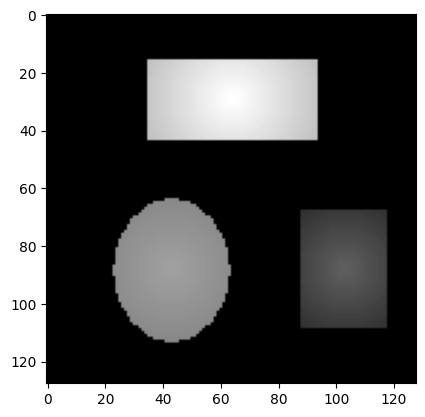

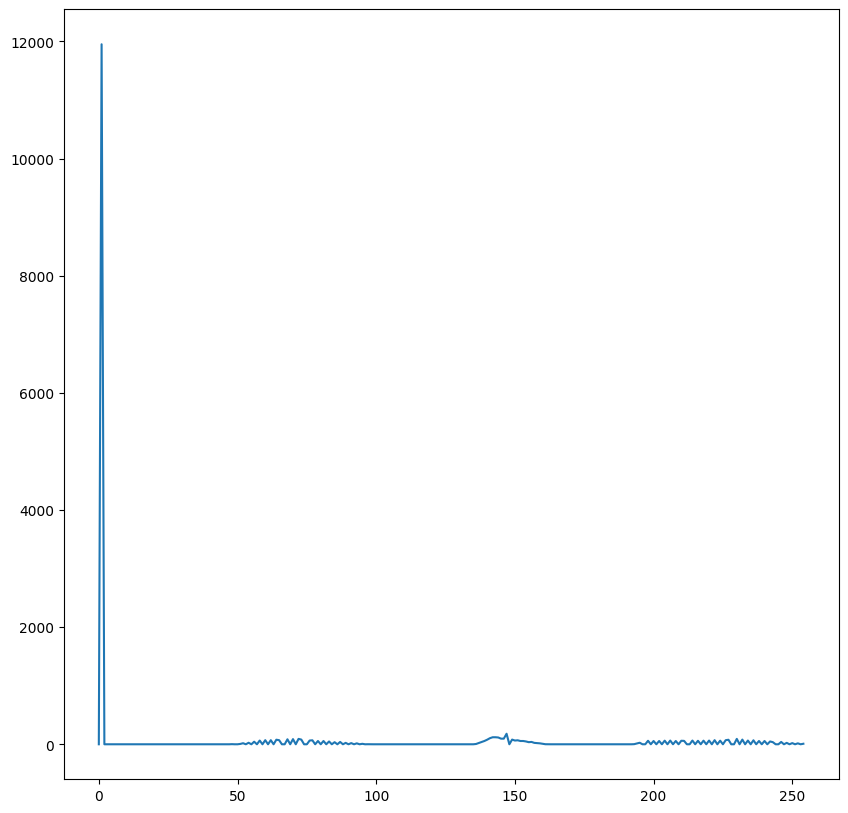

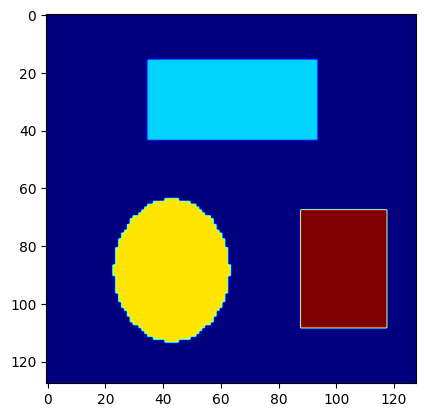

In [ ]:
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt

img = io.imread('tst2.bmp')
img = color.rgb2gray(img)
img = (img * 255).astype(int)

plt.figure()
plt.imshow(img, cmap = 'gray')

h, w = img.shape
hist,_ = np.histogram(img, range(0, 256))
plt.figure(figsize = (10, 10))
plt.plot(hist)

img_labels = np.zeros([h, w], dtype = int)
img_labels[np.logical_and(img >= 25, img <= 125)] = 3
img_labels[np.logical_and(img >= 125, img <= 175)] = 2
img_labels[img > 175] = 1

plt.figure()
plt.imshow(img_labels, cmap = 'jet', vmin = 0, vmax = 3)

### Exercise 2: Add gaussian noise to "tst2.bmp" of different intensities and segment it.
Hint: a fast way to add noise to an image is to use scikit image
```python
from skimage import io,color,util
# other code
noisy_img = util.random_noise(img,mean=0,var=3)
```
To change the intensity of the noise change the ```var``` argument.


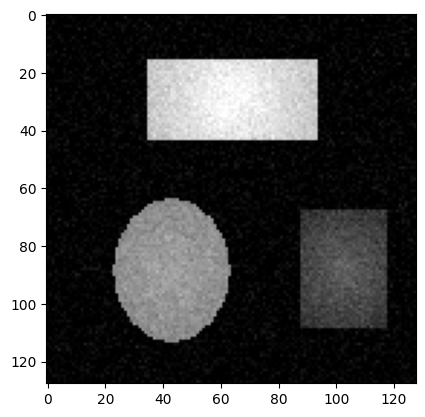

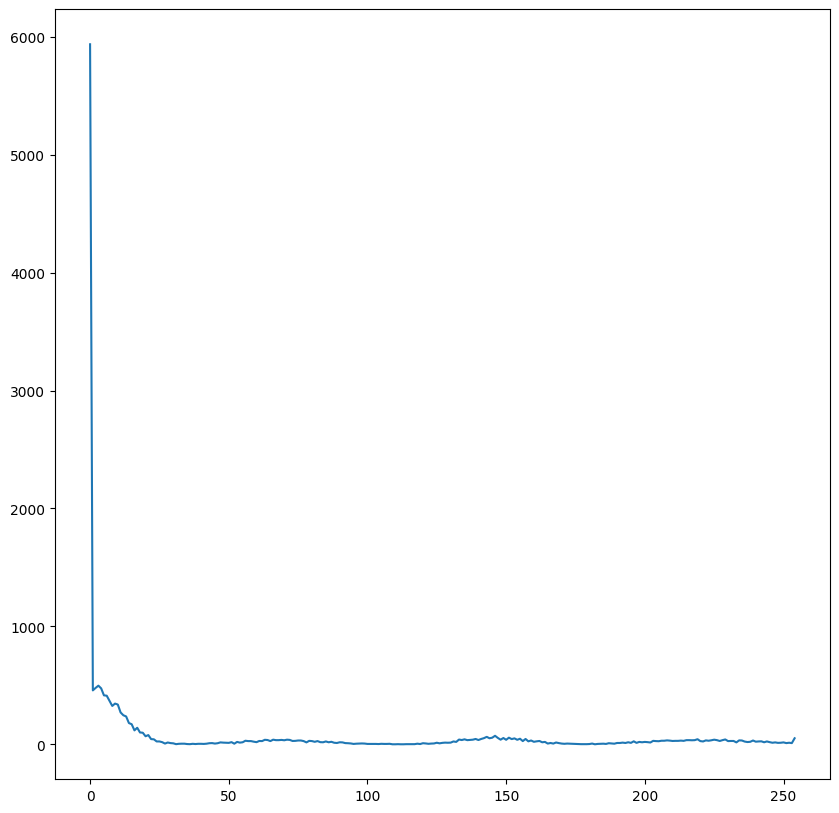

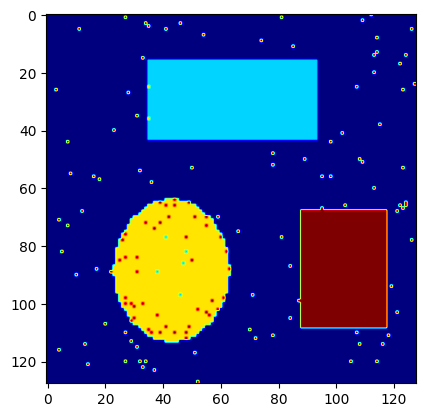

In [21]:
import numpy as np
from skimage import io, color, util
import matplotlib.pyplot as plt

img = io.imread('tst2.bmp')
img = color.rgb2gray(img)
img = util.random_noise(img, mean = 0, var = (10/255) ** 2)
img = (img * 255).astype(int)

plt.figure()
plt.imshow(img, cmap = 'gray')

h, w = img.shape
hist,_ = np.histogram(img, range(0, 256))
plt.figure(figsize = (10, 10))
plt.plot(hist)

img_labels = np.zeros([h, w], dtype = int)
img_labels[np.logical_and(img >= 25, img <= 125)] = 3
img_labels[np.logical_and(img >= 125, img <= 175)] = 2
img_labels[img > 175] = 1

plt.figure()
plt.imshow(img_labels, cmap = 'jet', vmin = 0, vmax = 3)

### Exercise 3: Add gaussian noise to "tst1.bmp" and segment it. What solutions are there for the faulty segmentation?

"\nimg_f1 = img_labels.copy()\n\nfor i in range(border, h - border):\n    for j in range(border, w - border):\n        V = img_labels[i - border:i + border + 1, j - border:j + border + 1]\n        V = np.sort(V, axis = None)\n        img_f1[i, j] = V[4]\n\n\nplt.figure()\nplt.imshow(img_f, cmap = 'jet', vmin = 0, vmax = 4)\n"

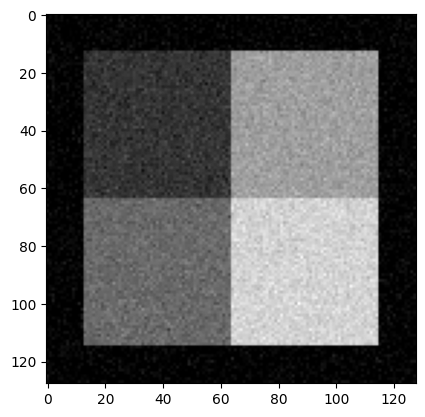

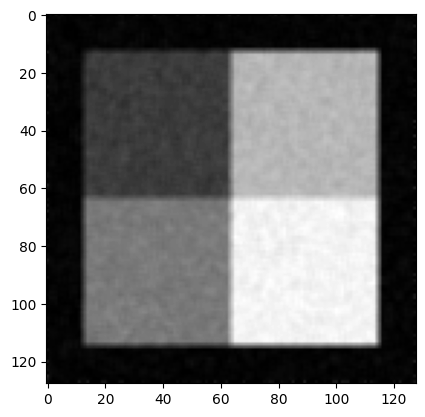

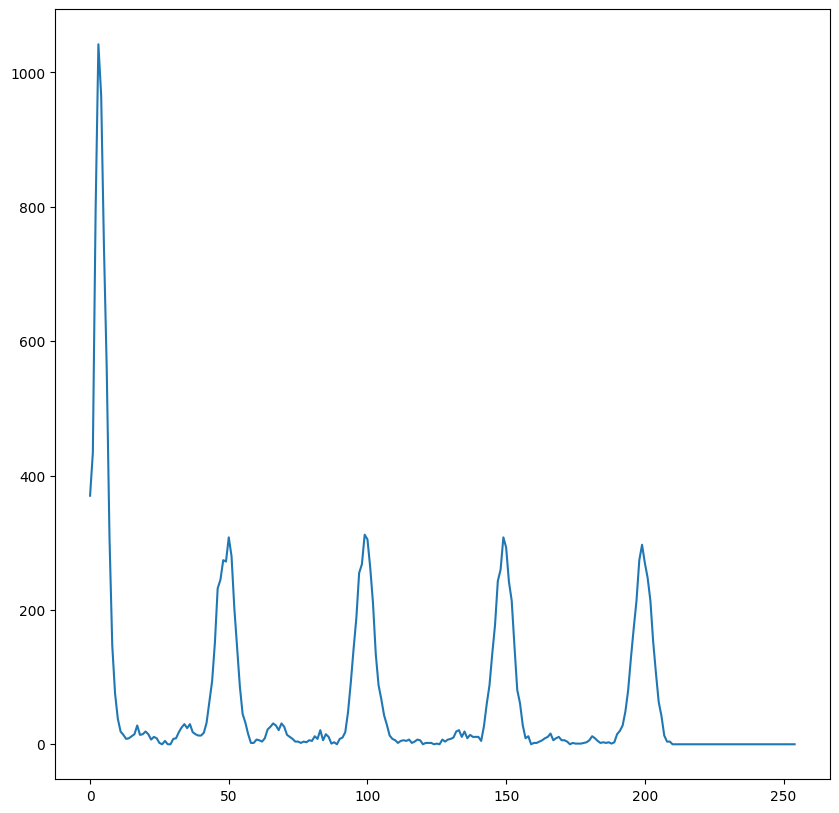

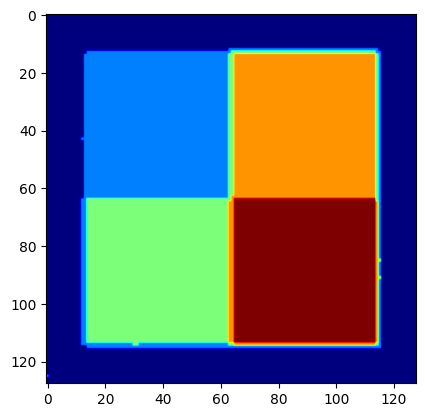

In [41]:
import numpy as np
from skimage import io, color, util
import matplotlib.pyplot as plt

img = io.imread('tst1.bmp')
img = color.rgb2gray(img)
img = util.random_noise(img, mean = 0, var = (10/255) ** 2)
img = (img * 255).astype(int)

plt.figure()
plt.imshow(img, cmap = 'gray')

h, w = img.shape
border = 3 // 2

#extra
mask = np.ones([3, 3]) / 9
img_f = img.copy()

for i in range(border, h - border):
    for j in range(border, w - border):
        V = img[i - border:i + border + 1, j - border:j + border + 1]
        img_f[i, j] = np.sum(V * mask)

plt.figure()
plt.imshow(img_f, cmap = 'gray')
        
hist,_ = np.histogram(img_f, range(0, 256))
plt.figure(figsize = (10, 10))
plt.plot(hist)

img_labels = np.zeros([h, w], dtype = int)
img_labels[np.logical_and(img_f >= 25, img_f <= 75)] = 1
img_labels[np.logical_and(img_f >= 75, img_f <= 125)] = 2
img_labels[np.logical_and(img_f >= 125, img_f <= 175)] = 3
img_labels[img_f > 175] = 4

plt.figure()
plt.imshow(img_labels, cmap = 'jet', vmin = 0, vmax = 4)

'''
img_f1 = img_labels.copy()

for i in range(border, h - border):
    for j in range(border, w - border):
        V = img_labels[i - border:i + border + 1, j - border:j + border + 1]
        V = np.sort(V, axis = None)
        img_f1[i, j] = V[4]


plt.figure()
plt.imshow(img_f, cmap = 'jet', vmin = 0, vmax = 4)
'''
